In [33]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt
import json

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


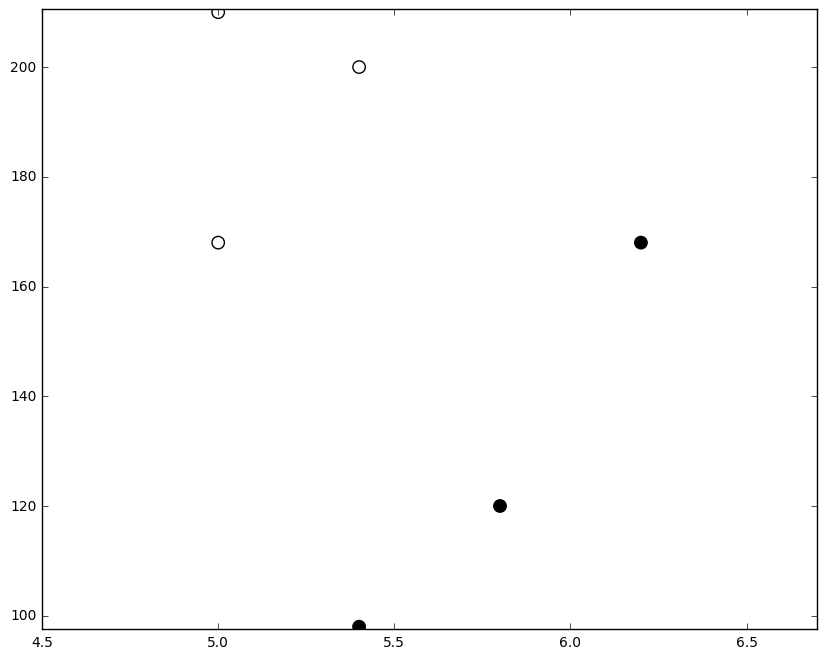

In [43]:
from __future__ import division
np.random.seed(1)
N = 4 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
# X = np.zeros((N*K,D))
# y = np.zeros(N*K, dtype='uint8')
# for j in xrange(K):
#   ix = range(N*j,N*(j+1))
#   r = np.linspace(0.0,1,N) # radius
#   t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
#   X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
#   y[ix] = j


# Linearly separable case for the Logistic regression
filePrefix = 'LinearlySeparableCase-'
X = np.array([[5.4,98],
    [5.8,120],
    [6.2,168],
    [5.4,200],
    [5,210],
    [5,168]])
y= [0,0,0,1,1,1]

# Linearly non-separable case for the NN
# filePrefix = 'LinearlyNonSeparableCase-'
# X = np.array([[98,5.5],
#     [155,5.2],
#     [120,5.7],
#     [168,6.2],
#     [200,5.5],
#     [210,5],
#     [168,5],
#     [110,6.0],
#     [125,5.8]])
# y= [0,0,0,0,1,1,1,1,1]




fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=80)
plt.xlim([np.min(X[:,0])-.5,np.max(X[:,0])+.5])
plt.ylim([np.min(X[:,1])-.5,np.max(X[:,1])+.5])
fig.savefig(filePrefix + 'raw.png')

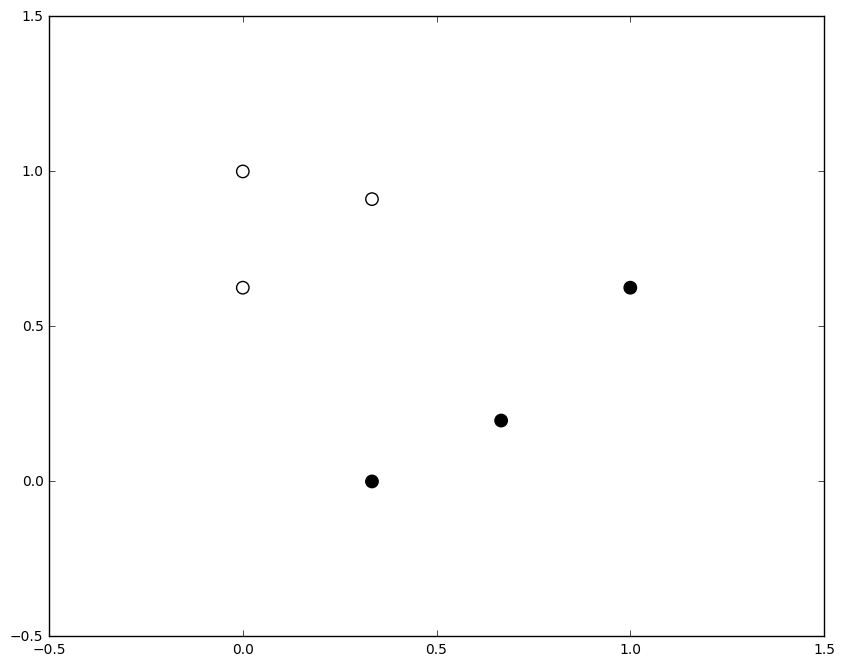

In [44]:
# Step 1
# Normalize data 

X1 = map(lambda x: (x-np.min(X[:,0]))/(np.max(X[:,0])-np.min(X[:,0])), X[:,0])
X2 = map(lambda x: (x-np.min(X[:,1]))/(np.max(X[:,1])-np.min(X[:,1])), X[:,1])
X = np.array(zip(X1,X2))

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=80)
plt.xlim([np.min(X[:,0])-.5,np.max(X[:,0])+.5])
plt.ylim([np.min(X[:,1])-.5,np.max(X[:,1])+.5])
fig.savefig(filePrefix + 'normalized.png')

In [45]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1
reg = 1e-3 # regularization strength

losses = []
weights = []
biases = []

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(20000):
  
    # evaluate class scores, [N x K], this hasonly one layer, so scores are predicted results
    scores = np.dot(X, W) + b 
  
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    
    #   if i % 10 == 0:
    #     print "iteration %d: loss %f" % (i, loss)
    
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples
  
    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    dW += reg*W # regularization gradient
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
  
    losses.append(loss.tolist())
    weights.append(W.tolist())
    biases.append(b.tolist())
    
with open(filePrefix + "LRweights.txt","w") as f:
    f.write(json.dumps(weights))
with open(filePrefix + "LRlosses.txt","w") as f:
    f.write(json.dumps(losses))
with open(filePrefix + "LRbiases.txt","w") as f:
    f.write(json.dumps(biases))

In [46]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 1.00


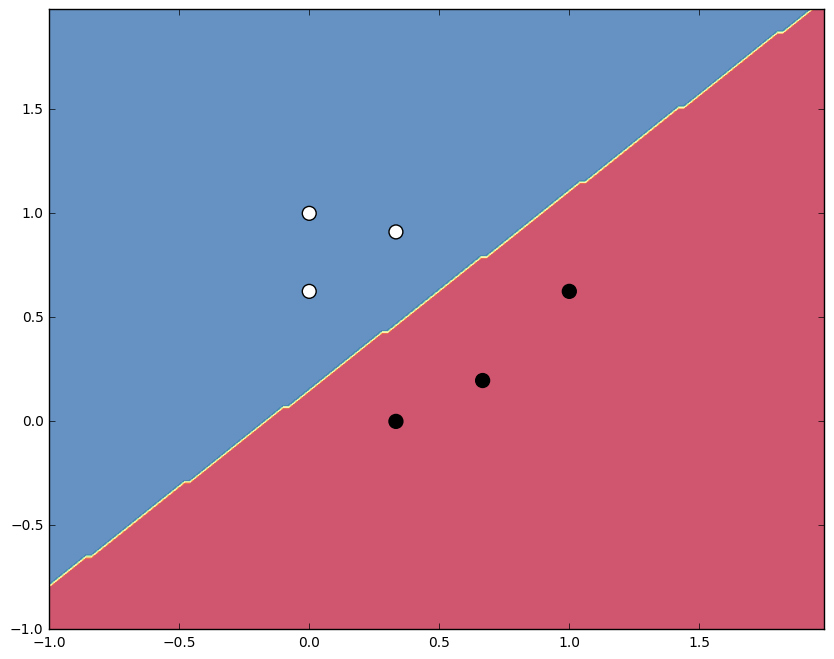

In [47]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
fig.savefig(filePrefix + 'LR_contourf.png')

In [48]:
print Z.shape

(150, 150)


In [49]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# store intermediate values
losses = []

# layer 1
weights = []
biases = []

# layer 2
weights2 = []
biases2 = []

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(10000):
  
    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2
  
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print "iteration %d: loss %f" % (i, loss)
  
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples
  
    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
  
    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
  
    losses.append(loss.tolist())
    weights.append(W.tolist())
    biases.append(b.tolist())
  
    weights2.append(W2.tolist())
    biases2.append(b2.tolist())
    
with open(filePrefix + "NNlosses.txt","w") as f:
    f.write(json.dumps(losses))
    
with open(filePrefix + "NNweights.txt","w") as f:
    f.write(json.dumps(weights))
with open(filePrefix + "NNbiases.txt","w") as f:
    f.write(json.dumps(biases))  
    
with open(filePrefix + "NNweights2.txt","w") as f:
    f.write(json.dumps(weights2))
with open(filePrefix + "NNbiases2.txt","w") as f:
    f.write(json.dumps(biases2))  

iteration 0: loss 0.693303
iteration 1000: loss 0.014384
iteration 2000: loss 0.014335
iteration 3000: loss 0.014324
iteration 4000: loss 0.014321
iteration 5000: loss 0.014319
iteration 6000: loss 0.014319
iteration 7000: loss 0.014318
iteration 8000: loss 0.014317
iteration 9000: loss 0.014317


In [50]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 1.00


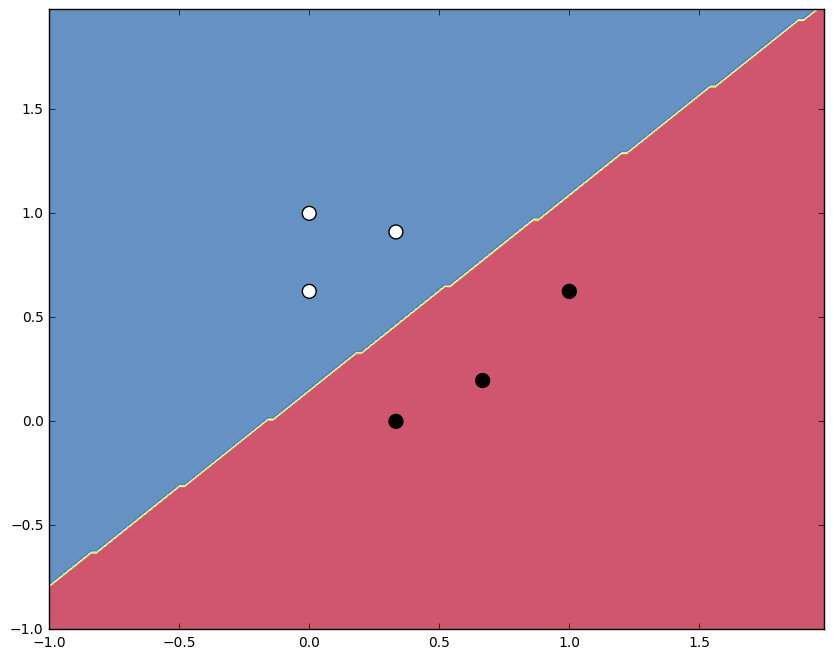

In [51]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
fig.savefig(filePrefix + 'NN_contourf.png')